In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import anndata
import dynamo as dyn
dyn.get_all_dependencies_version()

2023-12-12 20:33:55.825643: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-12 20:33:57.207838: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


package,tqdm,statsmodels,setuptools,scipy,scikit-learn,pandas,numpy,networkx,matplotlib,anndata,igraph,loompy,numdifftools,umap-learn,numba,seaborn,colorcet,pynndescent,pre-commit,get-version,openpyxl,typing-extensions,session-info,dynamo-release
version,4.65.0,0.14.0,68.0.0,1.10.0,1.2.2,1.5.3,1.22.3,2.8.4,3.7.1,0.9.1,0.10.4,3.0.7,0.9.41,0.5.3,0.56.4,0.12.2,3.0.1,0.5.8,3.2.0,3.5.4,3.2.0b1,4.5.0,1.0.0,1.3.3


In [2]:
import scvelo as scv
scv.logging.print_version()

scv.settings.verbosity = 3  # show errors(0), warnings(1), info(2), hints(3)
scv.settings.presenter_view = True  # set max width size for presenter view
scv.set_figure_params('scvelo')  # for beautified visualization

Running scvelo 0.2.5 (python 3.10.11) on 2023-12-12 20:34.


ERROR: XMLRPC request failed [code: -32500]
RuntimeError: PyPI no longer supports 'pip search' (or XML-RPC search). Please use https://pypi.org/search (via a browser) instead. See https://warehouse.pypa.io/api-reference/xml-rpc.html#deprecated-methods for more information.


In [3]:
adata = anndata.read("mouse_retina.h5ad")

In [4]:
dyn.pp.recipe_monocle(adata)

|-----? dynamo.preprocessing.deprecated is deprecated.
|-----> recipe_monocle_keep_filtered_cells_key is None. Using default value from DynamoAdataConfig: recipe_monocle_keep_filtered_cells_key=True
|-----> recipe_monocle_keep_filtered_genes_key is None. Using default value from DynamoAdataConfig: recipe_monocle_keep_filtered_genes_key=True
|-----> recipe_monocle_keep_raw_layers_key is None. Using default value from DynamoAdataConfig: recipe_monocle_keep_raw_layers_key=True
|-----> apply Monocole recipe to adata...
|-----> ensure all cell and variable names unique.
|-----> ensure all data in different layers in csr sparse matrix format.
|-----> ensure all labeling data properly collapased
|-----> filtering cells...
|-----> 2683 cells passed basic filters.
|-----> filtering gene...
|-----> 4836 genes passed basic filters.
|-----> calculating size factor...
|-----> selecting genes in layer: X, sort method: SVR...
|-----> size factor normalizing the data, followed by log1p transformation.

In [5]:
dyn.tl.reduceDimension(adata)

|-----> retrieve data for non-linear dimension reduction...
|-----? adata already have basis umap. dimension reduction umap will be skipped! 
set enforce=True to re-performing dimension reduction.
|-----> Start computing neighbor graph...
|-----------> X_data is None, fetching or recomputing...
|-----> fetching X data from layer:None, basis:pca
|-----> method arg is None, choosing methods automatically...
|-----------> method ball_tree selected
|-----> [UMAP] completed [0.1997s]


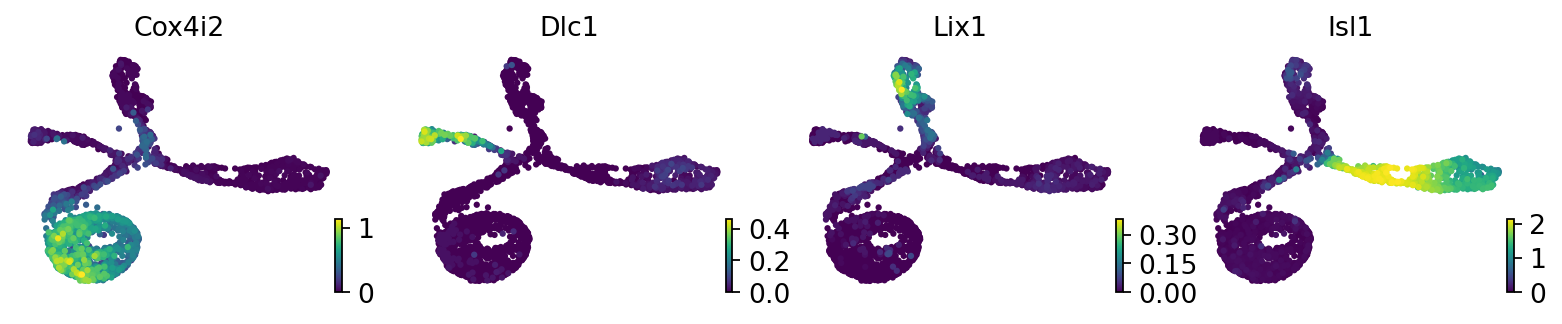

In [6]:
scv.pl.scatter(adata, color=['Cox4i2','Dlc1','Lix1','Isl1'], color_map='viridis', smooth=True)

In [7]:
dyn.tl.dynamics(adata, model='stochastic', cores=100)

|-----> dynamics_del_2nd_moments_key is None. Using default value from DynamoAdataConfig: dynamics_del_2nd_moments_key=False
|-----------> removing existing M layers:[]...
|-----------> making adata smooth...
|-----> calculating first/second moments...
|-----> [moments calculation] completed [13.7200s]


AnnData object with n_obs × n_vars = 2726 × 31053
    obs: 'Clusters', 'Annotation', 'nGenes', 'nCounts', 'pMito', 'pass_basic_filter', 'Size_Factor', 'initial_cell_size', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'ntr', 'cell_cycle_phase'
    var: 'nCells', 'nCounts', 'pass_basic_filter', 'score', 'log_m', 'log_cv', 'frac', 'use_for_pca', 'ntr', 'beta', 'gamma', 'half_life', 'alpha_b', 'alpha_r2', 'gamma_b', 'gamma_r2', 'gamma_logLL', 'delta_b', 'delta_r2', 'bs', 'bf', 'uu0', 'ul0', 'su0', 'sl0', 'U0', 'S0', 'total0', 'use_for_dynamics'
    uns: 'paper_review_url', 'paper_url', 'pp', 'velocyto_SVR', 'PCs', 'explained_variance_ratio_', 'pca_mean', 'pca_fit', 'feature_selection', 'cell_phase_genes', 'neighbors', 'dynamics'
    obsm: 'X_umap', 'X_pca', 'X', 'cell_cycle_scores'
    layers: 'spliced', 'unspliced', 'X_spliced', 'X_unspliced', 'M_u', 'M_uu', 'M_s', 'M_us', 'M_ss', 'velocity_S'
    obsp: 'distances', 'connectiv

In [8]:
dyn.tl.cell_velocities(adata, method='cosine')
dyn.tl.cell_velocities(adata, basis='pca', method="cosine")

|-----> [calculating transition matrix via cosine kernel with sqrt transform.] in progress: 100.0000%|-----> [calculating transition matrix via cosine kernel with sqrt transform.] completed [1.3754s]
|-----> [projecting velocity vector to low dimensional embedding] in progress: 100.0000%|-----> [projecting velocity vector to low dimensional embedding] completed [0.6027s]
Using existing cosine_transition_matrix found in .obsp.
|-----> [projecting velocity vector to low dimensional embedding] in progress: 100.0000%|-----> [projecting velocity vector to low dimensional embedding] completed [0.6661s]


AnnData object with n_obs × n_vars = 2726 × 31053
    obs: 'Clusters', 'Annotation', 'nGenes', 'nCounts', 'pMito', 'pass_basic_filter', 'Size_Factor', 'initial_cell_size', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'ntr', 'cell_cycle_phase'
    var: 'nCells', 'nCounts', 'pass_basic_filter', 'score', 'log_m', 'log_cv', 'frac', 'use_for_pca', 'ntr', 'beta', 'gamma', 'half_life', 'alpha_b', 'alpha_r2', 'gamma_b', 'gamma_r2', 'gamma_logLL', 'delta_b', 'delta_r2', 'bs', 'bf', 'uu0', 'ul0', 'su0', 'sl0', 'U0', 'S0', 'total0', 'use_for_dynamics', 'use_for_transition'
    uns: 'paper_review_url', 'paper_url', 'pp', 'velocyto_SVR', 'PCs', 'explained_variance_ratio_', 'pca_mean', 'pca_fit', 'feature_selection', 'cell_phase_genes', 'neighbors', 'dynamics', 'grid_velocity_umap', 'grid_velocity_pca'
    obsm: 'X_umap', 'X_pca', 'X', 'cell_cycle_scores', 'velocity_umap', 'velocity_pca'
    layers: 'spliced', 'unspliced', 'X_spliced', '

In [9]:
dyn.vf.VectorField(adata, basis='pca')
dyn.vf.VectorField(adata, basis='umap')

|-----> VectorField reconstruction begins...
|-----> Retrieve X and V based on basis: PCA. 
        Vector field will be learned in the PCA space.
|-----> Learning vector field with method: sparsevfc.
|-----> [SparseVFC] begins...
|-----> Sampling control points based on data velocity magnitude...
|-----> [SparseVFC] completed [0.1656s]
|-----> [VectorField] completed [0.2991s]
|-----> VectorField reconstruction begins...
|-----> Retrieve X and V based on basis: UMAP. 
        Vector field will be learned in the UMAP space.
|-----> Generating high dimensional grids and convert into a row matrix.
|-----> Learning vector field with method: sparsevfc.
|-----> [SparseVFC] begins...
|-----> Sampling control points based on data velocity magnitude...
|-----> [SparseVFC] completed [0.2440s]
|-----> [VectorField] completed [0.3435s]


In [10]:
basis = "pca"
dyn.vf.speed(adata, basis=basis)
dyn.vf.divergence(adata, basis=basis)
dyn.vf.acceleration(adata, basis=basis)
dyn.vf.curvature(adata, basis=basis)

Calculating divergence: 100%|█████████████████████████████████████████| 3/3 [00:00<00:00,  7.01it/s]


|-----> [Calculating acceleration] in progress: 100.0000%|-----> [Calculating acceleration] completed [0.1056s]
|-----> [Calculating acceleration] in progress: 100.0000%|-----> [Calculating acceleration] completed [0.1149s]
|-----> [Calculating curvature] in progress: 100.0000%|-----> [Calculating curvature] completed [0.1246s]


|-----------> plotting with basis key=X_umap
|-----------> plotting with basis key=X_umap
|-----------> plotting with basis key=X_umap
|-----------> plotting with basis key=X_umap


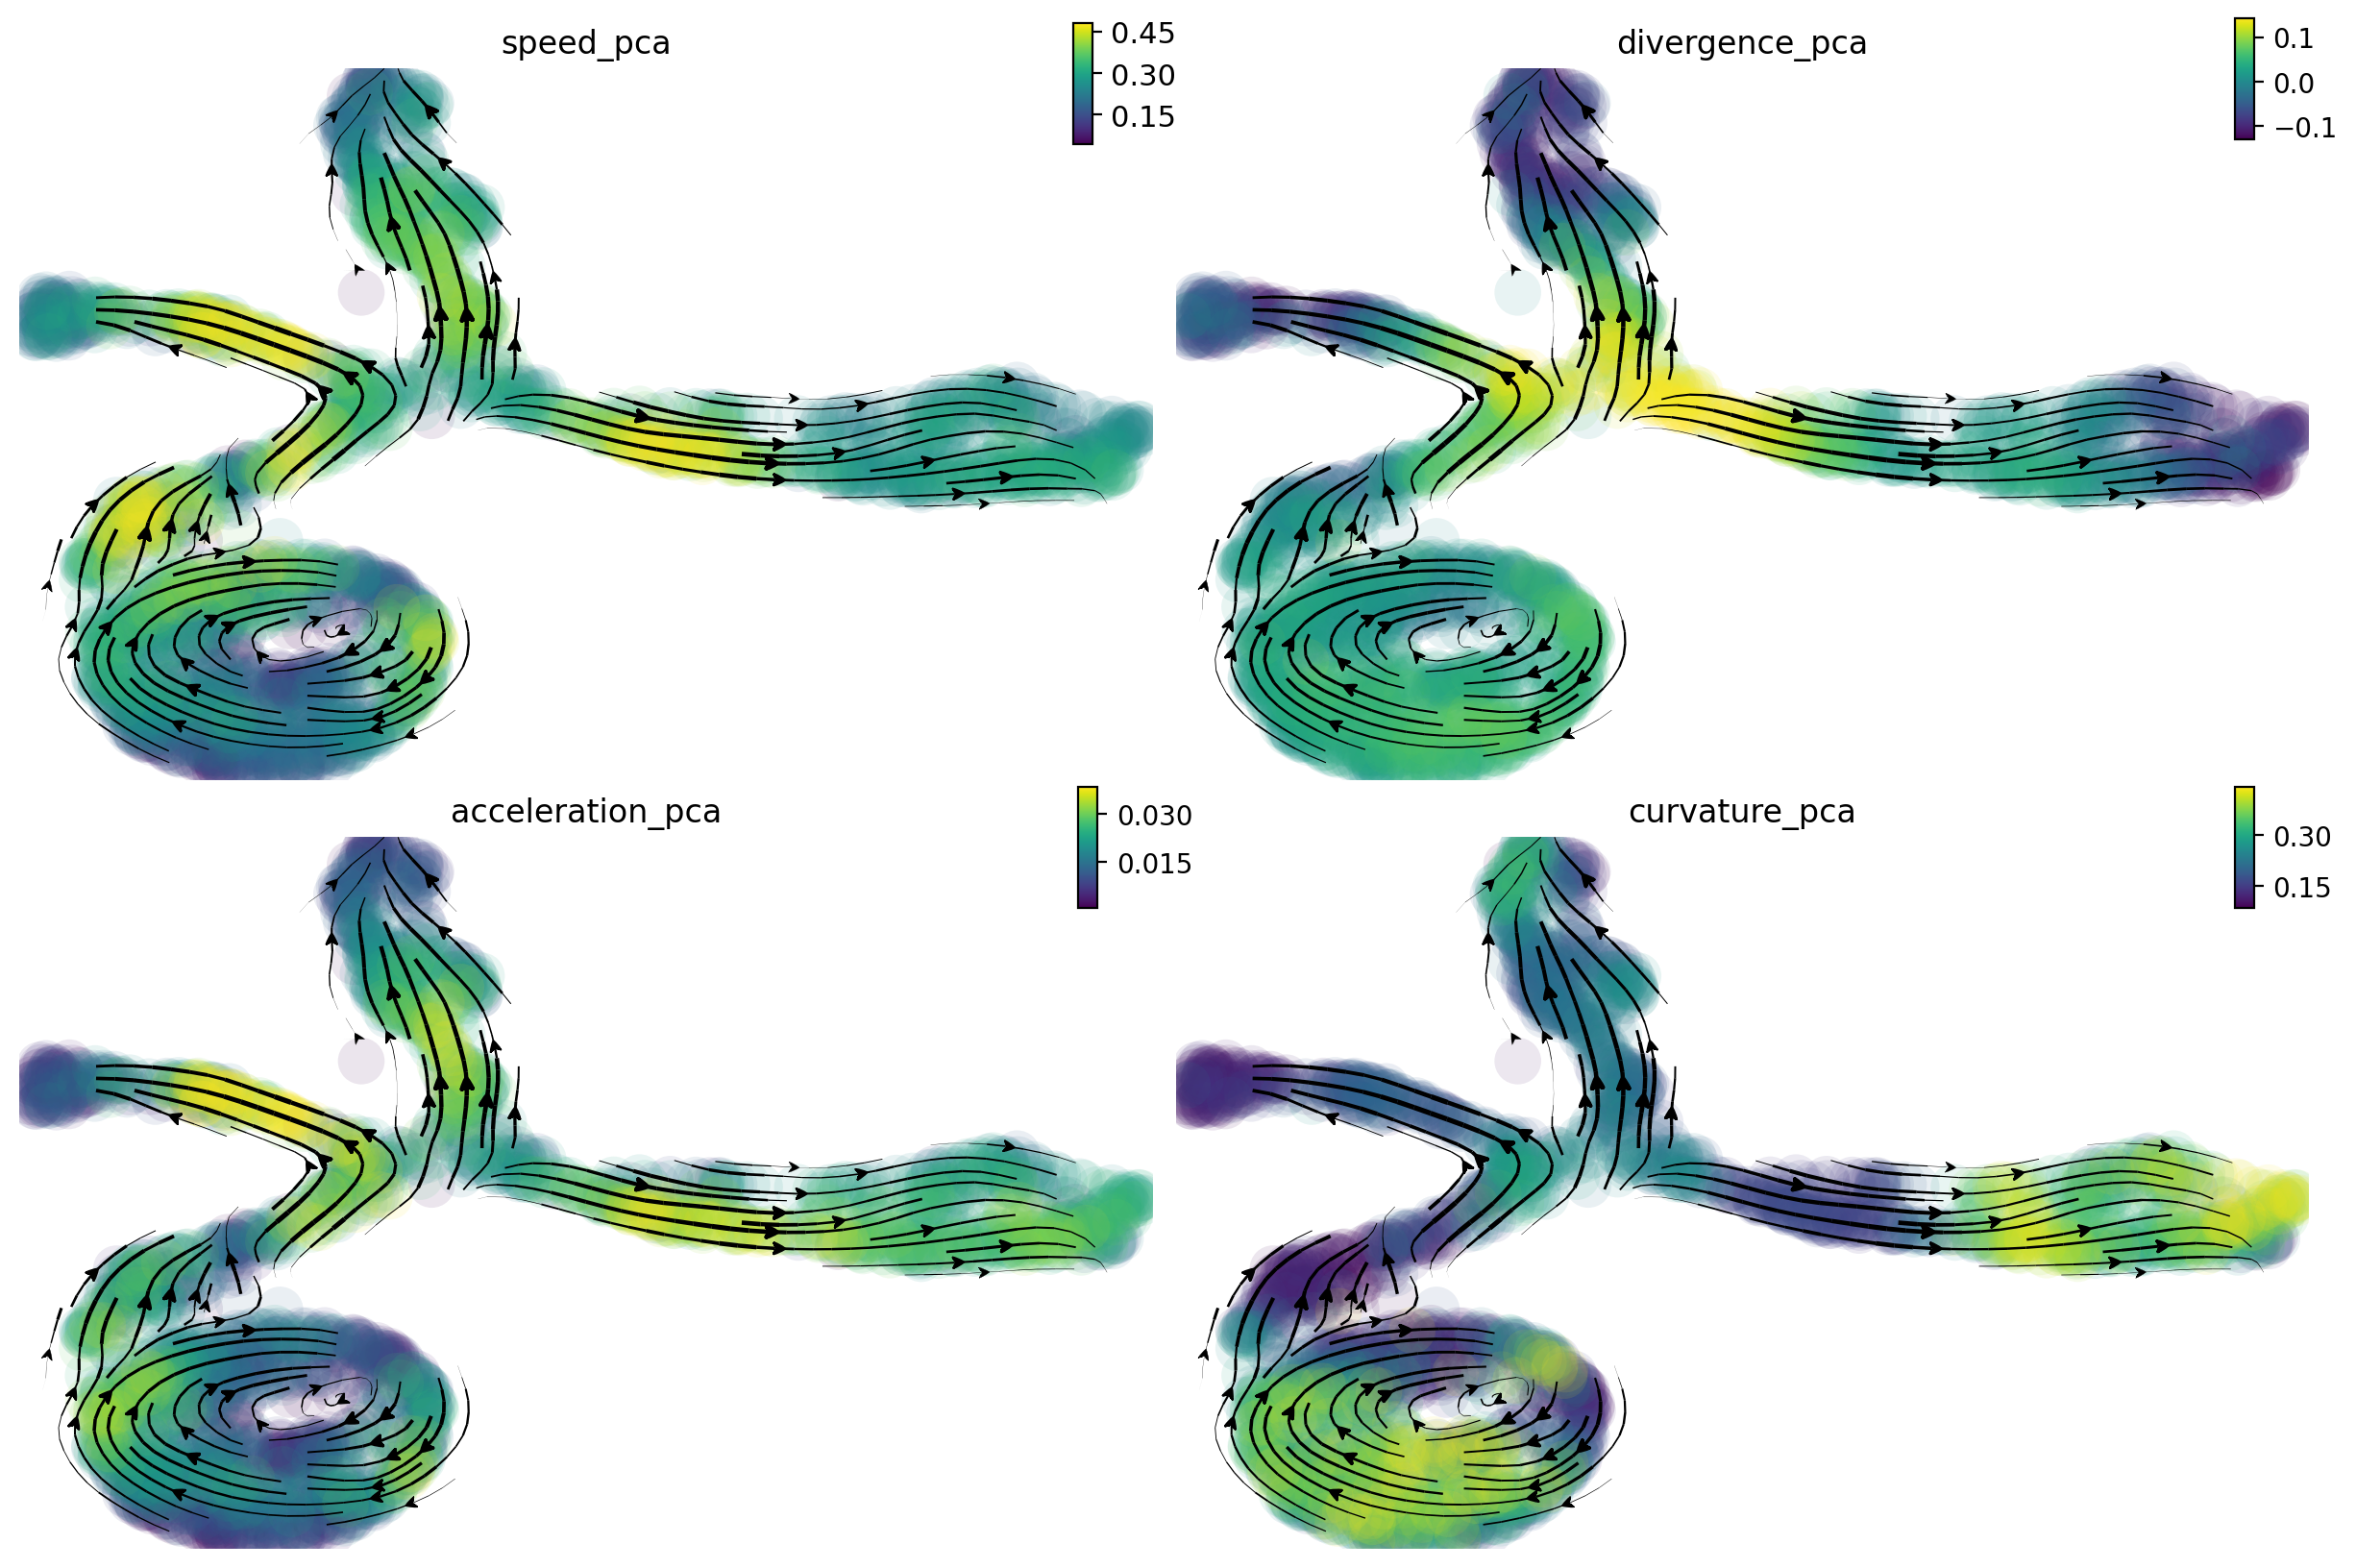

In [11]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(ncols=2, nrows=2, constrained_layout=True, figsize=(12, 8))
axes
dyn.pl.streamline_plot(adata, color="speed_" + basis, ax=axes[0, 0], save_show_or_return="return")
dyn.pl.streamline_plot(adata, color="acceleration_" + basis, ax=axes[1, 0], save_show_or_return="return")
dyn.pl.streamline_plot(adata, color="divergence_" + basis, ax=axes[0, 1], save_show_or_return="return",)
dyn.pl.streamline_plot(adata, color="curvature_" + basis, ax=axes[1, 1], save_show_or_return="return")
plt.show()